## Simple Linear Regression

### Objective: To predict the Median House Value based on Median Income

In [1]:
# Importing libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

SEED = 42
np.random.seed(SEED)

### Loading the Data
You can manually download the 'California Housing Prices' csv data set from Kaggle [here](https://www.kaggle.com/camnugent/california-housing-prices).

In [2]:
df = pd.read_csv("housing.csv")

### Step 1: Initial EDA & Data Preparation

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Setting up an example to demonstrate simple linear regression, 
# thus keeping only 'median_income' as the independent variable 
# and 'median_house_value' as the dependent variable

df = df[['median_income', 'median_house_value']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   median_house_value  20640 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


In [6]:
df.head(10)

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
5,4.0368,269700.0
6,3.6591,299200.0
7,3.1200,241400.0
8,2.0804,226700.0
9,3.6912,261100.0


### Step 2: EDA & Data Preprocessing
* What values do you see?
* What distributions do you see?
* What relationships do you see?
* What relationships do you think might benefit the prediction problem?
* What ideas about the domain does the data spark?

In [7]:
df.columns

Index(['median_income', 'median_house_value'], dtype='object')

In [8]:
df.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


In [9]:
df.tail()

,median_income,median_house_value
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0
20639,2.3886,89400.0


In [10]:
df.sample(5)

,median_income,median_house_value
20046,1.6812,47700.0
3024,2.5313,45800.0
15663,3.4801,500001.0
20484,5.7376,218600.0
9814,3.7250,278000.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_income       20640 non-null  float64
 1   median_house_value  20640 non-null  float64
dtypes: float64(2)
memory usage: 322.6 KB


In [12]:
# Get an overall sense of the data shape with the mean/median, min, max, q1, q3 values
df.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


In [13]:
df_na = df.isna().sum()
df_na
# this will show only features that have nonzero missing values
# df_na[df_na!=0]

median_income         0
median_house_value    0
dtype: int64

In [14]:
# limit to categorical data using df.select_dtypes()
df_cat = df.select_dtypes(include=['object'])
df_cat.nunique()

Series([], dtype: float64)

In [15]:
# limit to numerical data using df.select_dtypes()
df_num = df.select_dtypes(include=['number'])
df_num.nunique()

median_income         12928
median_house_value     3842
dtype: int64

In [16]:
# look at correlations in the numerical independent variables, as well as the dependent variable
df_num.corr()

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


In [17]:
# df['median_house_value'].nlargest()
# df['median_house_value'].nsmallest()

In [18]:
# df['median_house_value'].value_counts()

In [19]:
# df['median_house_value'].unique()

In [20]:
df.groupby(by='median_house_value').count().sort_values('median_house_value', ascending=False).head(10)

,median_income
median_house_value,
500001.0,965
500000.0,27
499100.0,1
499000.0,1
498800.0,1
498700.0,1
498600.0,1
498400.0,1
497600.0,1


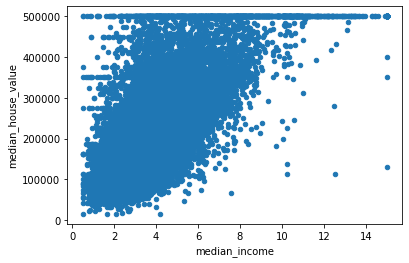

In [21]:
_ = df.plot.scatter('median_income', 'median_house_value')

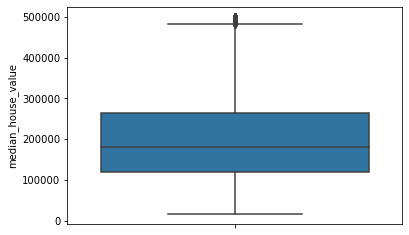

In [22]:
# Boxplot using Matplotlib
# _ = plt.boxplot(df['bmi'])
#
# Boxplot using Pandas DataFrame
# _ = df.boxplot(column=['bmi'])
#
# Boxplot using Seaborn
_ = sns.boxplot(y='median_house_value', data=df)

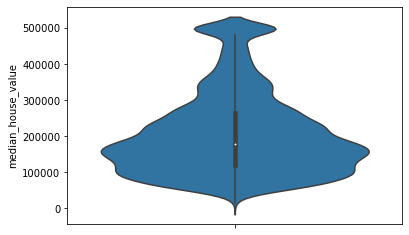

In [23]:
# Violin plot using Seaborn
_ = sns.violinplot(y='median_house_value', data=df)

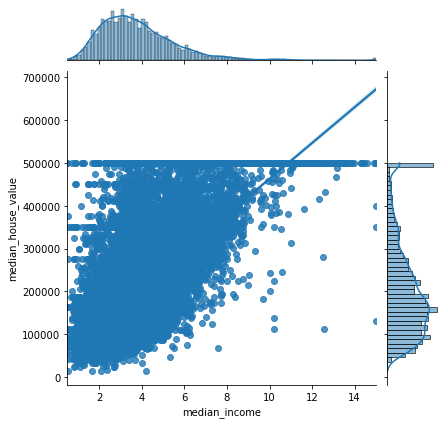

In [24]:
# visualize the correlation between an independent variable and the dependent variable
_ = sns.jointplot(x="median_income", y="median_house_value", data=df, kind="reg")

In [25]:
# Removing outliers
df.drop(df[df['median_house_value']>500000].index, inplace=True)

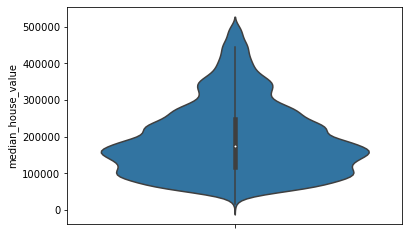

In [26]:
_ = sns.violinplot(y='median_house_value', data=df)

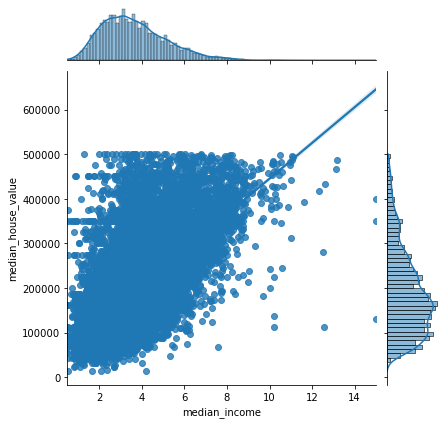

In [27]:
_ = sns.jointplot(x="median_income", y="median_house_value", data=df, kind="reg")

### Step 3: Preparing the data for training and testing

1) Divide our independent and dependent variable into two separate variables.

2) Split the data into training and testing datasets.

In [28]:
# 1)

X = df.iloc[:,0].values.reshape(-1,1) # input
y = df.iloc[:,1].values # output (dependent variable)

In [29]:
# 2) Splitting our data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=False, random_state=SEED)

### Step 4: Training the model

In [30]:
# Import the linear regression algorithm
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

LinearRegression()

### Step 5: Visualize the trained model

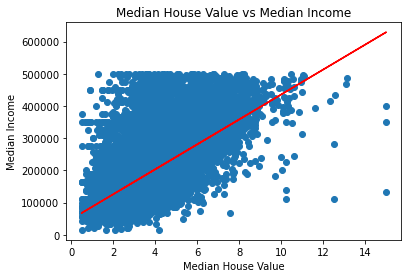

In [31]:
# y=mx+c (Linear regression model)
line = regressor.coef_*X + regressor.intercept_

# Lets plot this on the scatter plot
plt.scatter(X,y)
plt.plot(X,line, 'r')
plt.xlabel("Median House Value")
plt.ylabel("Median Income")
plt.title("Median House Value vs Median Income")
plt.show()

### Step 6: Testing the model

In [32]:
# Kept aside some data to test - X_test
y_pred = regressor.predict(X_test)

compare_df = pd.DataFrame({"Desired Output (Actuals)": y_test, 
                           "Predicted Output": y_pred})

In [33]:
compare_df

,Desired Output (Actuals),Predicted Output
0,120100.0,197876.668995
1,133100.0,147113.850476
2,163300.0,194308.254946
3,70700.0,122661.312553
4,87800.0,147233.829690
...,...,...
3930,78100.0,108592.782108
3931,77100.0,147160.294043
3932,92300.0,113999.587343
3933,84700.0,120470.724318


### Step 7: Evaluate the model

In [34]:
# The coefficients
print('Coefficients: \n', regressor.coef_)

# The mean squared error
print('Mean squared error: {:.2f}'.format(mean_squared_error(y_test, y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: {:.2f}'.format(r2_score(y_test, y_pred)))

Coefficients: 
 [38702.97233842]
Mean squared error: 5831038297.42
Coefficient of determination: 0.44


In [35]:
# Evaluate the model's training score and test score
print("Regression model's training score = {:.2f}".format(regressor.score(X_train, y_train)))
print("Regression model's test score     = {:.2f}".format(regressor.score(X_test, y_test)))

Regression model's training score = 0.40
Regression model's test score     = 0.44


### Step 8: My own prediction

In [36]:
own_pred = regressor.predict([[4.0]])
print("My target value is = ", str(own_pred[0]))

My target value is =  203016.42372186485


### End of the notebook